In [1]:
import networkx as nx
import numpy as np
from networkx.algorithms.approximation import average_clustering
import thinkstats2
import matplotlib.pyplot as plt
import math
import thinkplot

"""
This generates the powerlaw graph with the needed parameters which are 4039 nodes with 22 random edges for each node.
"""

def powerlaw_graph(n = 4039, k = 22, p = 0):
    g = nx.powerlaw_cluster_graph(n, k, p)
    
    return g

"""
This generates the degree per node of the graph G (same as in the textbook)
"""

def degrees(G):
    
    return [G.degree(u) for u in G]

g = powerlaw_graph(4039, 22, 0.9)

pmf_plaw = thinkstats2.Pmf(degrees(g))

print(pmf_plaw.Mean(), pmf_plaw.Std(), average_clustering(g))

43.69596434761078 40.99307197011022 0.112


The result of this is that although the number of nodes and average degree per node is correct, the clustering coefficient is different. The value of the clustering coefficient here is dependent on the probability $p$ as shown in the following graph:

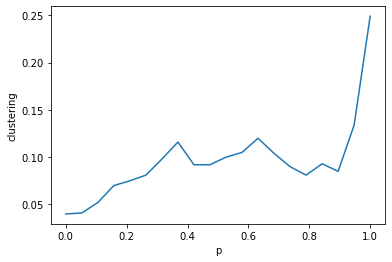

In [2]:
x_data = np.linspace(0,1,20)
y_data = [average_clustering(powerlaw_graph(4039, 22, k)) for k in x_data]

plt.plot(x_data,y_data)
plt.xlabel('p')
plt.ylabel('clustering')
plt.show()

This however is nowhere near the value of around 0.6 in the Facebook data

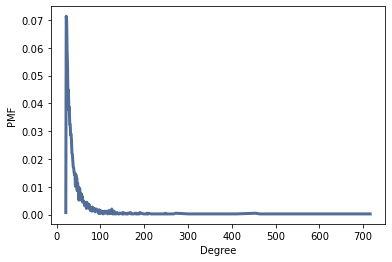

In [3]:
thinkplot.Pdf(pmf_plaw)
plt.xlabel('Degree')
plt.ylabel('PMF')
plt.show()

The degree distribution however is similar to the Facebook data as shown in Figure 4.1 in the textbook.

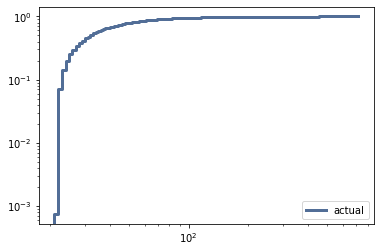

<Figure size 576x432 with 0 Axes>

In [4]:
"""
This generates the required dataset for the CDF plot

This part of the code will be reused for exercise 4.3
"""

cdf_deg = thinkstats2.Cdf(degrees(g), label='actual')

"""
This generates the CDF plot in a log-x scale
"""

thinkplot.cdf(cdf_deg)
thinkplot.show(xscale='log', yscale='log')

This shows that the $\text{log}(CDF)$ sharply increases between $ 10^1 $ and $ 10^2 $ similar to the plot given in figure 4.4 in the textbook.

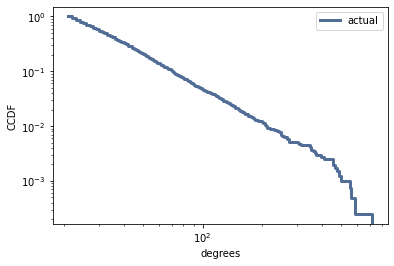

<Figure size 576x432 with 0 Axes>

In [5]:
"""
This generates the CCDF plot using the thinkplot
"""

thinkplot.cdf(cdf_deg, complement=True)
thinkplot.show(xlabel = 'degrees', ylabel = 'CCDF', yscale='log', xscale='log')

The CCDF plot is very different as compared to the Facebook dataset found in figure 4.5 in the textbook.